In [1]:
import pandas as pd

# Az adathalmaz betöltése egy megfelelő adattáblába
data = pd.read_csv("healthcare-dataset-stroke-data.csv")

# Adathalmaz mérete
print("Az adathalmaz mérete (sorok, oszlopok):", data.shape)

# Oszlopok és adattípusok
print("\nOszlopok és adattípusok:")
data.info()

# Első 5 sor
print("\nAz adathalmaz első 5 sora:")
print(data.head())

# Uccsó 5 sor
print("\nAz adathalmaz utolsó 5 sora:")
print(data.tail())


Az adathalmaz mérete (sorok, oszlopok): (5110, 12)

Oszlopok és adattípusok:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB

Az adathalmaz első 5 sora:
      id  gender   age  hypertension  heart_disease 

In [2]:
# Alapvető statisztikák
distribution_stats = data.describe().T

# Medián
distribution_stats['median'] = data.median(numeric_only=True)

# Statisztikák
print("Az adatok statisztikai jellemzői:")
print(distribution_stats)

# Hiányzó értékek
missing_values = data.isnull().sum()
print("\nHiányzó értékek oszloponként:")
print(missing_values)


Az adatok statisztikai jellemzői:
                    count          mean           std    min        25%  \
id                 5110.0  36517.829354  21161.721625  67.00  17741.250   
age                5110.0     43.226614     22.612647   0.08     25.000   
hypertension       5110.0      0.097456      0.296607   0.00      0.000   
heart_disease      5110.0      0.054012      0.226063   0.00      0.000   
avg_glucose_level  5110.0    106.147677     45.283560  55.12     77.245   
bmi                4909.0     28.893237      7.854067  10.30     23.500   
stroke             5110.0      0.048728      0.215320   0.00      0.000   

                         50%       75%       max     median  
id                 36932.000  54682.00  72940.00  36932.000  
age                   45.000     61.00     82.00     45.000  
hypertension           0.000      0.00      1.00      0.000  
heart_disease          0.000      0.00      1.00      0.000  
avg_glucose_level     91.885    114.09    271.74     91

In [3]:
# Hiányzó értékek pótlása (átlaggal a BMI oszlopban)
data['bmi'] = data['bmi'].fillna(data['bmi'].mean())

# Hibás vagy értelmetlen adatok eltávolítása ('gender' oszlopból az 'Other' kategória)
data = data[data['gender'] != 'Other']

# Duplikált sorok eltávolítása
data = data.drop_duplicates()

# Adathalmaz tisztasága
data_shape_after_cleaning = data.shape
missing_values_after_cleaning = data.isnull().sum()

print("Adathalmaz tisztítása után:")
print("Adathalmaz mérete:", data_shape_after_cleaning)
print("Hiányzó értékek oszloponként:")
print(missing_values_after_cleaning)



Adathalmaz tisztítása után:
Adathalmaz mérete: (5109, 12)
Hiányzó értékek oszloponként:
id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64


C:\Users\arvai\AppData\Local\Temp\ipykernel_26844\4076420605.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x='stroke', palette='viridis')


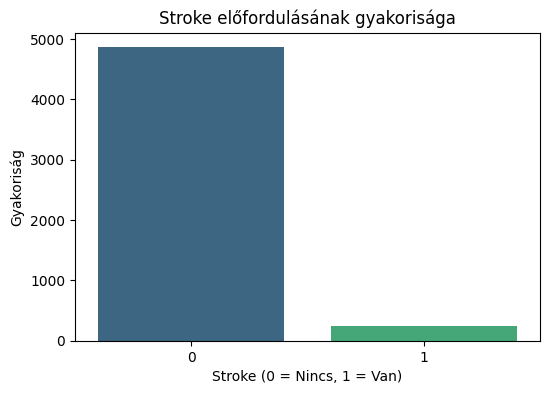

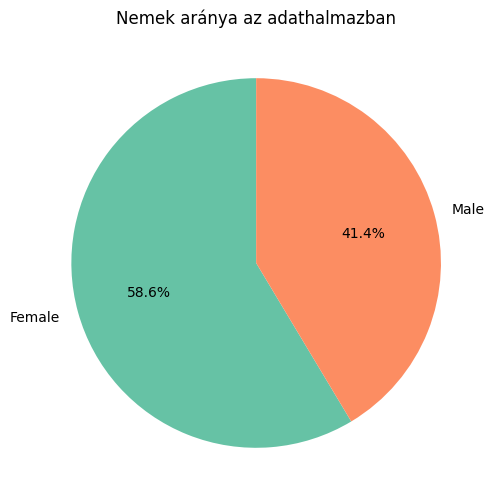

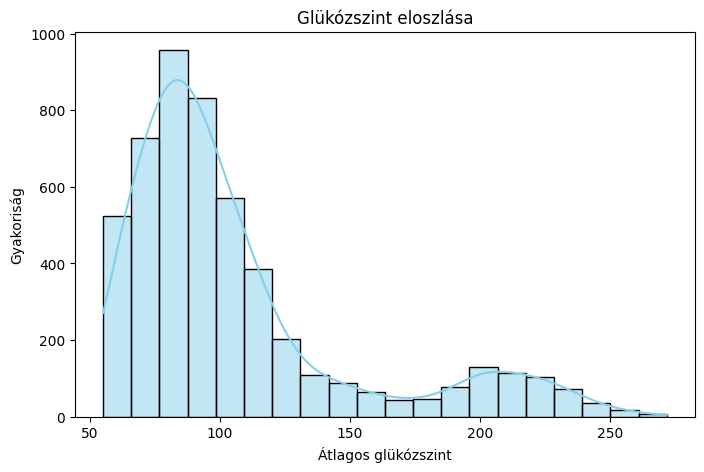

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

# Oszlopdiagram: A stroke előfordulásának gyakorisága
plt.figure(figsize=(6, 4))
sns.countplot(data=data, x='stroke', palette='viridis')
plt.title('Stroke előfordulásának gyakorisága')
plt.xlabel('Stroke (0 = Nincs, 1 = Van)')
plt.ylabel('Gyakoriság')
plt.show()

# Kördiagram: Nemek aránya az adathalmazban
gender_counts = data['gender'].value_counts()
plt.figure(figsize=(6, 6))
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=90, colors=['#66c2a5', '#fc8d62'])
plt.title('Nemek aránya az adathalmazban')
plt.show()

# Hisztogram: Glükózszint eloszlása
plt.figure(figsize=(8, 5))
sns.histplot(data['avg_glucose_level'], kde=True, color='skyblue', bins=20)
plt.title('Glükózszint eloszlása')
plt.xlabel('Átlagos glükózszint')
plt.ylabel('Gyakoriság')
plt.show()


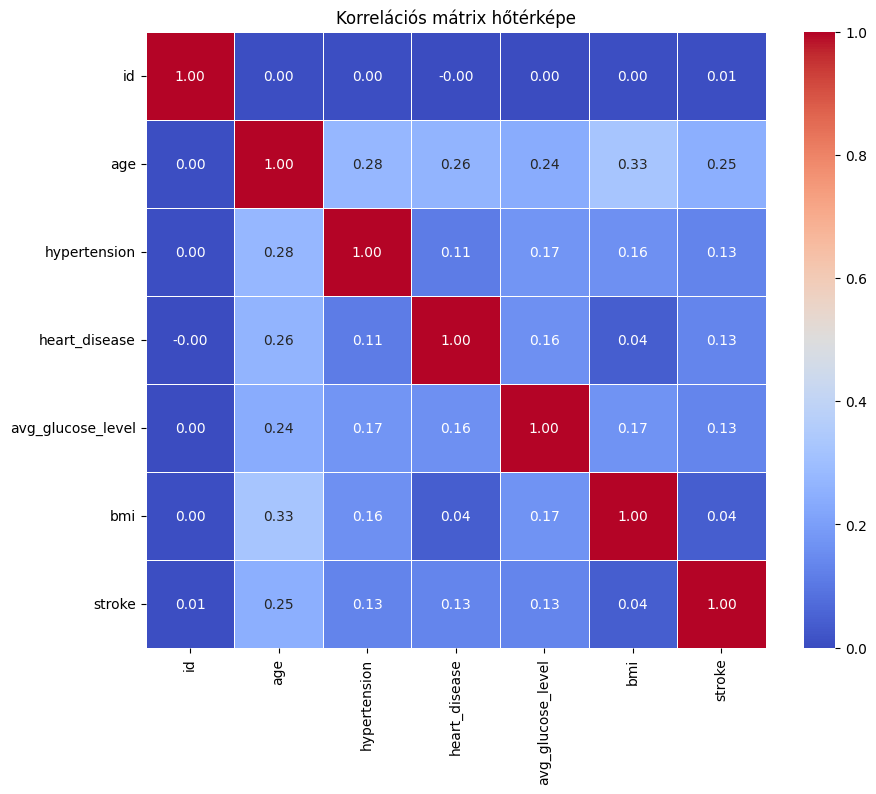

Erős pozitív korrelációk (> 0.4):
Series([], dtype: float64)

Erős negatív korrelációk (< -0.4):
Series([], dtype: float64)


In [5]:
# Csak numerikus oszlopokat tartalmazó DataFrame
numerical_data = data.select_dtypes(include=['float64', 'int64'])

# Korrelációs mátrix
correlation_matrix = numerical_data.corr()

# Hőtérkép
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Korrelációs mátrix hőtérképe')
plt.show()

# A legerősebb korrelációk azonosítása
strong_correlations = correlation_matrix.unstack().sort_values(ascending=False).drop_duplicates()
strong_correlations = strong_correlations[strong_correlations.index.get_level_values(0) != strong_correlations.index.get_level_values(1)]

# Legrészletesebb korrelációk kiemelése (küszöbérték legyen: 0.4-nél erősebb)
strong_positive = strong_correlations[strong_correlations > 0.4]
strong_negative = strong_correlations[strong_correlations < -0.4]

print("Erős pozitív korrelációk (> 0.4):")
print(strong_positive)
print("\nErős negatív korrelációk (< -0.4):")
print(strong_negative)


In [6]:
import scipy.stats as stats

# Hipertónia és stroke gyakorisági táblázat létrehozása
contingency_table = pd.crosstab(data['hypertension'], data['stroke'])

# Khi-négyzet teszt
chi2, p, dof, expected = stats.chi2_contingency(contingency_table)

print("Khi-négyzet érték:", chi2)
print("P-érték:", p)
print("Szabadságfokok:", dof)

# Nullhipotézis jó-e
alpha = 0.05
if p < alpha:
    print("Elutasítjuk a nullhipotézist: van kapcsolat a hipertónia és a stroke között.")
else:
    print("Nem tudjuk elutasítani a nullhipotézist: nincs szignifikáns kapcsolat a hipertónia és a stroke között.")


Khi-négyzet érték: 81.57314462043591
P-érték: 1.688936253410575e-19
Szabadságfokok: 1
Elutasítjuk a nullhipotézist: van kapcsolat a hipertónia és a stroke között.


In [7]:
import pandasql as ps

data = pd.read_csv("healthcare-dataset-stroke-data.csv")
# SELECT
query1 = "SELECT * FROM data LIMIT 5;"
result1 = ps.sqldf(query1, locals())
print("Az első 5 rekord:\n", result1)

# WHERE
query2 = "SELECT * FROM data WHERE hypertension = 1;"
result2 = ps.sqldf(query2, locals())
print("\nHipertóniás betegek:\n", result2.head())

# COUNT
query3 = "SELECT COUNT(*) AS stroke_cases FROM data WHERE stroke = 1;"
result3 = ps.sqldf(query3, locals())
print("\nStroke-esetek száma:\n", result3)

# GROUP BY
query4 = "SELECT gender, AVG(avg_glucose_level) AS avg_glucose FROM data GROUP BY gender;"
result4 = ps.sqldf(query4, locals())
print("\nÁtlagos glükózszint nemek szerint:\n", result4)

# ORDER BY
query5 = "SELECT * FROM data ORDER BY bmi DESC LIMIT 5;"
result5 = ps.sqldf(query5, locals())
print("\nLegmagasabb BMI-vel rendelkező betegek:\n", result5)


Az első 5 rekord:
       id  gender   age  hypertension  heart_disease ever_married  \
0   9046    Male  67.0             0              1          Yes   
1  51676  Female  61.0             0              0          Yes   
2  31112    Male  80.0             0              1          Yes   
3  60182  Female  49.0             0              0          Yes   
4   1665  Female  79.0             1              0          Yes   

       work_type Residence_type  avg_glucose_level   bmi   smoking_status  \
0        Private          Urban             228.69  36.6  formerly smoked   
1  Self-employed          Rural             202.21   NaN     never smoked   
2        Private          Rural             105.92  32.5     never smoked   
3        Private          Urban             171.23  34.4           smokes   
4  Self-employed          Rural             174.12  24.0     never smoked   

   stroke  
0       1  
1       1  
2       1  
3       1  
4       1  

Hipertóniás betegek:
       id  gend

Numerikus oszlopok statisztikai jellemzői (értéktartomány, átlag, szórás):
                     min       max          mean           std
id                 67.00  72940.00  36517.829354  21161.721625
age                 0.08     82.00     43.226614     22.612647
hypertension        0.00      1.00      0.097456      0.296607
heart_disease       0.00      1.00      0.054012      0.226063
avg_glucose_level  55.12    271.74    106.147677     45.283560
bmi                10.30     97.60     28.893237      7.854067
stroke              0.00      1.00      0.048728      0.215320


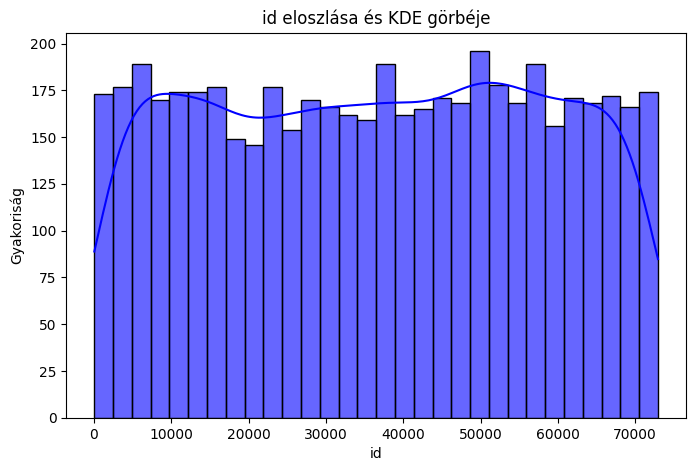

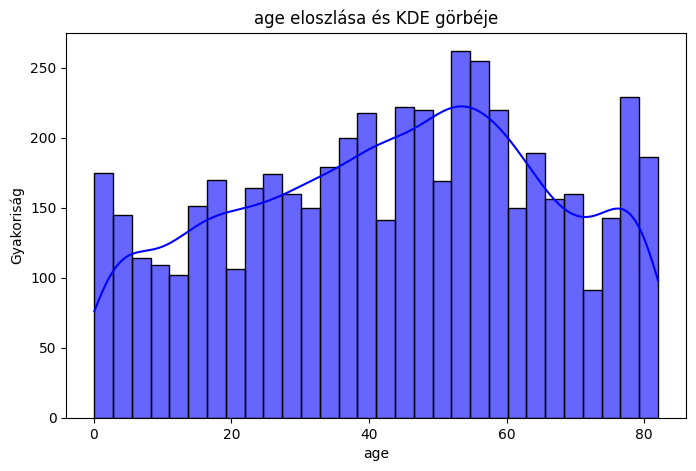

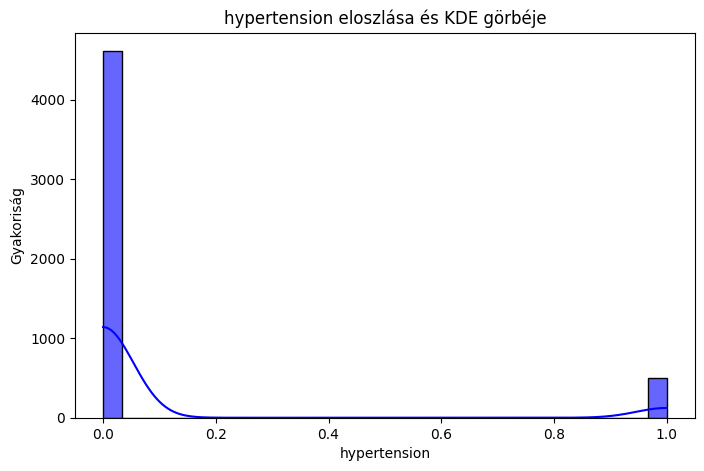

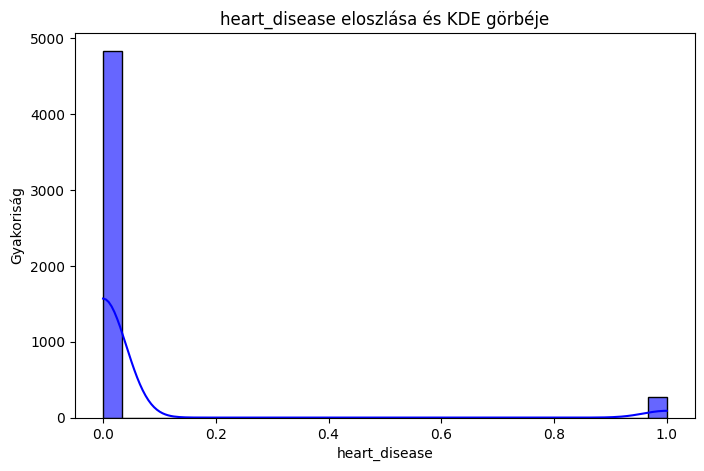

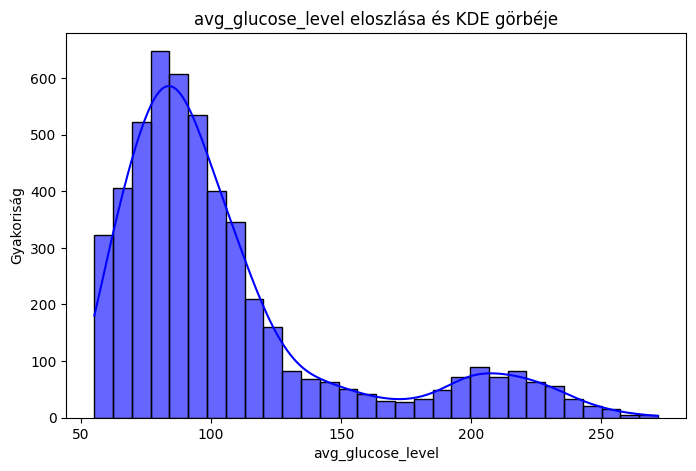

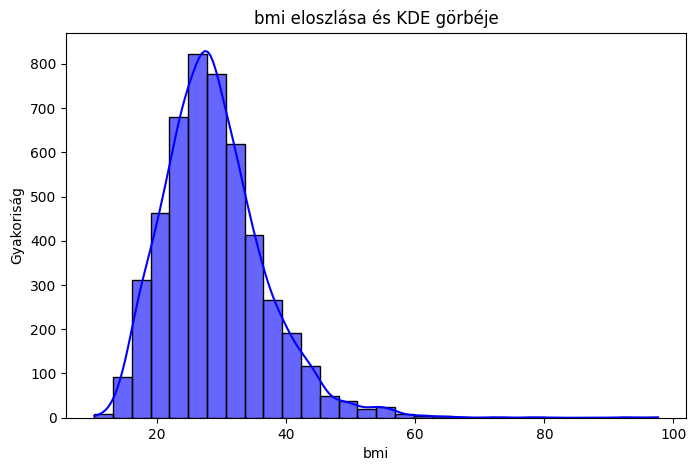

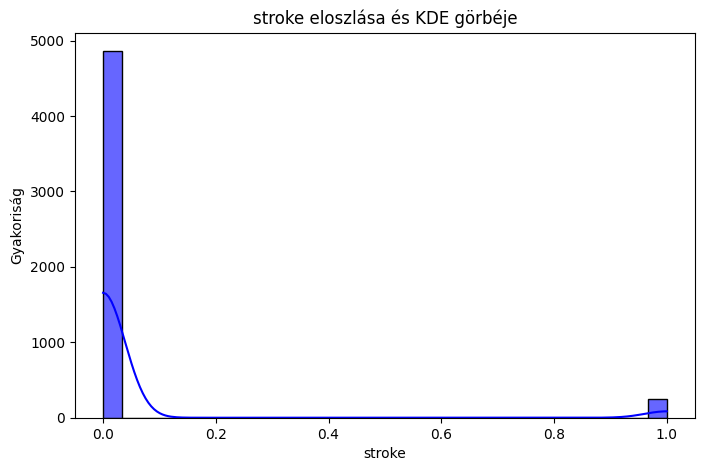


Kiugró értékeket tartalmazó sorok száma (oszloponként):
id                     0
age                    0
hypertension         498
heart_disease        276
avg_glucose_level    627
bmi                  311
stroke               249
dtype: int64

Teljes adathalmazban kiugró értékeket tartalmazó sorok száma: 1354


In [10]:
numerical_columns = data.select_dtypes(include=['float64', 'int64'])

# Statisztikai jellemzők, értéktartományok
range_info = numerical_columns.describe().T[['min', 'max', 'mean', 'std']]
print("Numerikus oszlopok statisztikai jellemzői (értéktartomány, átlag, szórás):")
print(range_info)

# Hisztogramok és KDE görbék
for column in numerical_columns.columns:
    plt.figure(figsize=(8, 5))
    sns.histplot(numerical_columns[column], kde=True, bins=30, color='blue', alpha=0.6)
    plt.title(f'{column} eloszlása és KDE görbéje')
    plt.xlabel(column)
    plt.ylabel('Gyakoriság')
    plt.show()

# IQR módszer
outliers = pd.DataFrame()

for column in numerical_columns.columns:
    q1 = numerical_columns[column].quantile(0.25) 
    q3 = numerical_columns[column].quantile(0.75)  
    iqr = q3 - q1 
    lower_bound = q1 - 1.5 * iqr  
    upper_bound = q3 + 1.5 * iqr 
    outliers[column] = ~numerical_columns[column].between(lower_bound, upper_bound)

print("\nKiugró értékeket tartalmazó sorok száma (oszloponként):")
print(outliers.sum())

total_outliers = outliers.any(axis=1).sum()
print("\nTeljes adathalmazban kiugró értékeket tartalmazó sorok száma:", total_outliers)


In [11]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Adatok előkészítése a gépi tanulási modellhez
# Célváltozó (target) és bemeneti változók (features) szétválasztása
X = data.drop(columns=['stroke', 'id', 'gender', 'smoking_status', 'work_type', 'Residence_type', 'ever_married'])
y = data['stroke']

# Hiányzó értékek
X.fillna(X.mean(), inplace=True)

# Adatok szétosztása tanuló és teszt adathalmazra
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Log regresszió
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Modell teljesítménye
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print("Modell pontossága (accuracy):", accuracy)
print("\nOsztályozási jelentés (classification report):")
print(classification_report(y_test, y_pred))
print("\nKonfúziós mátrix (confusion matrix):")
print(confusion_matrix(y_test, y_pred))


Modell pontossága (accuracy): 0.9393346379647749

Osztályozási jelentés (classification report):
              precision    recall  f1-score   support

           0       0.94      1.00      0.97       960
           1       0.00      0.00      0.00        62

    accuracy                           0.94      1022
   macro avg       0.47      0.50      0.48      1022
weighted avg       0.88      0.94      0.91      1022


Konfúziós mátrix (confusion matrix):
[[960   0]
 [ 62   0]]


c:\Users\arvai\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\arvai\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\arvai\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

Modell pontossága (accuracy): 0.87 ± 0.01
ROC AUC: 0.78 ± 0.02

Konfúziós mátrix:
[[884  88]
 [ 39  11]]


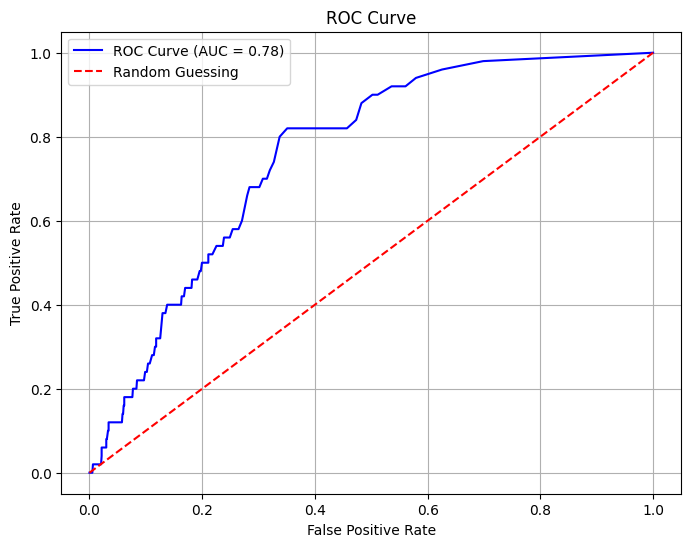

In [27]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import accuracy_score, roc_auc_score, classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE
import numpy as np
import matplotlib.pyplot as plt

X = data.drop(columns=['stroke', 'id', 'gender', 'smoking_status', 'work_type', 'Residence_type', 'ever_married'])
y = data['stroke']
X.fillna(X.mean(), inplace=True)

# Többszörös split
n_iterations = 10
accuracies = []
roc_aucs = []

for i in range(n_iterations):
    # Train-test split stratifikáltan
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=i)

    # SMOTE csak a tanuló adathalmazon
    smote = SMOTE(random_state=42)
    X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

    # Finomhangolás
    param_grid = {
        'n_estimators': [100, 200],
        'max_depth': [2, 5, None],
        'min_samples_split': [2, 5],
        'min_samples_leaf': [1, 2]
    }

    rf_model = RandomForestClassifier(random_state=42)
    grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=3, scoring='roc_auc', verbose=0)
    grid_search.fit(X_train_resampled, y_train_resampled)

    # Legjobb modell kiértékelése
    best_model = grid_search.best_estimator_
    y_pred = best_model.predict(X_test)
    y_prob = best_model.predict_proba(X_test)[:, 1]

    accuracies.append(accuracy_score(y_test, y_pred))
    roc_aucs.append(roc_auc_score(y_test, y_prob))

mean_accuracy = np.mean(accuracies)
std_accuracy = np.std(accuracies)
mean_roc_auc = np.mean(roc_aucs)
std_roc_auc = np.std(roc_aucs)

print(f"Modell pontossága (accuracy): {mean_accuracy:.2f} ± {std_accuracy:.2f}")
print(f"ROC AUC: {mean_roc_auc:.2f} ± {std_roc_auc:.2f}")

# Konfúziós mátrix és ROC görbe
conf_matrix = confusion_matrix(y_test, y_pred)
print("\nKonfúziós mátrix:")
print(conf_matrix)

fpr, tpr, thresholds = roc_curve(y_test, y_prob)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (AUC = {mean_roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--', label='Random Guessing')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.grid()
plt.show()




In [19]:
import plotly.express as px
data_cleaned = data.copy()
data_cleaned['bmi'] = data_cleaned['bmi'].fillna(data_cleaned['bmi'].mean())
data_cleaned = data_cleaned[data_cleaned['gender'] != 'Other']
data_cleaned = data_cleaned.drop_duplicates()

data_shape_after_cleaning = data_cleaned.shape
missing_values_after_cleaning = data_cleaned.isnull().sum()

print("Adathalmaz tisztítása után:")
print("Adathalmaz mérete:", data_shape_after_cleaning)
print("Hiányzó értékek oszloponként:")
print(missing_values_after_cleaning)


fig1 = px.pie(
    data_frame=data,
    names='gender',
    values='stroke',
    title='Stroke aránya nemek szerint',
    color_discrete_sequence=px.colors.sequential.Viridis
)
fig1.show()


fig2 = px.scatter(
    data_frame=data,
    x='avg_glucose_level',
    y='bmi',
    size='age',
    color='stroke',
    hover_data=['gender', 'work_type'],
    title='Glükózszint és BMI kapcsolata kor szerint',
    labels={'avg_glucose_level': 'Átlagos glükózszint', 'bmi': 'BMI'}
)
fig2.show()


fig3 = px.histogram(
    data_frame=data,
    x='age',
    color='stroke',
    nbins=20,
    title='Kor eloszlása stroke alapján',
    color_discrete_sequence=px.colors.qualitative.Set2
)
fig3.update_layout(bargap=0.1)
fig3.show()


fig4 = px.bar(
    data_frame=data,
    x='work_type',
    y='stroke',
    color='gender',
    barmode='group',
    title='Munkatípus és stroke aránya nemek szerint',
    labels={'stroke': 'Stroke arány'},
    color_discrete_sequence=px.colors.qualitative.Bold
)
fig4.show()


age_stroke_ratio = data.groupby('age')['stroke'].mean().reset_index()
fig5 = px.line(
    data_frame=age_stroke_ratio,
    x='age',
    y='stroke',
    title='Stroke aránya az életkor szerint',
    labels={'stroke': 'Stroke arány', 'age': 'Kor'},
    line_shape='spline'
)
fig5.show()



Adathalmaz tisztítása után:
Adathalmaz mérete: (5109, 12)
Hiányzó értékek oszloponként:
id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64


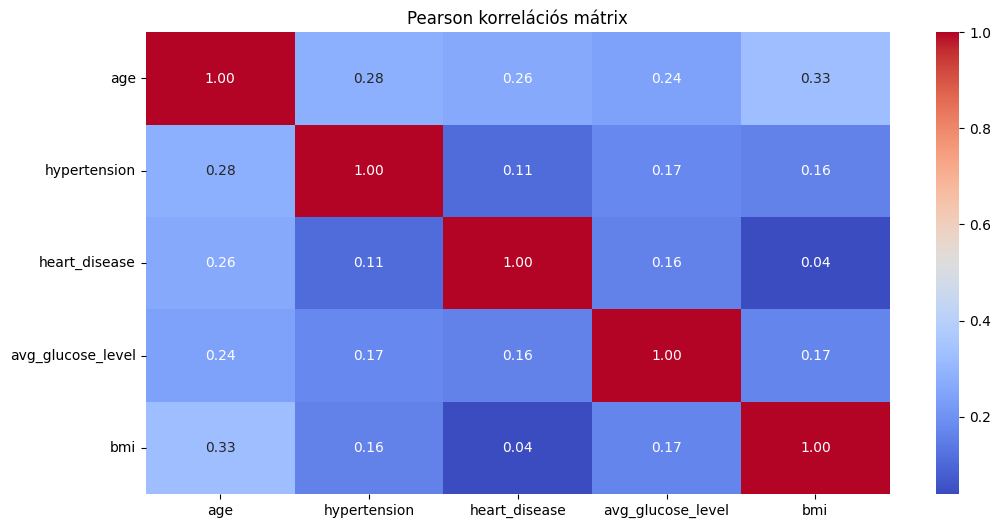

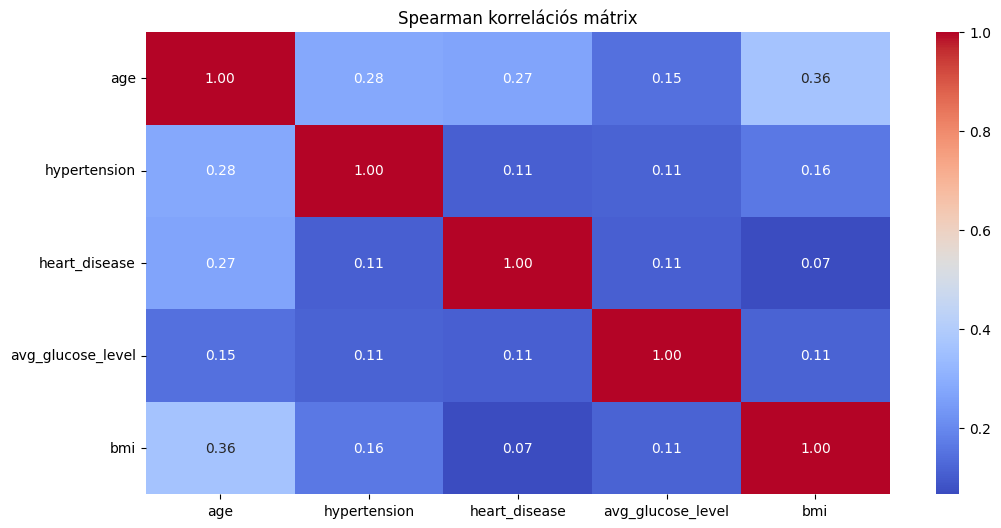

Pearson korreláció stroke és age között: 0.25
Pearson korreláció stroke és hypertension között: 0.13
Pearson korreláció stroke és heart_disease között: 0.13
Pearson korreláció stroke és avg_glucose_level között: 0.13
Pearson korreláció stroke és bmi között: 0.04


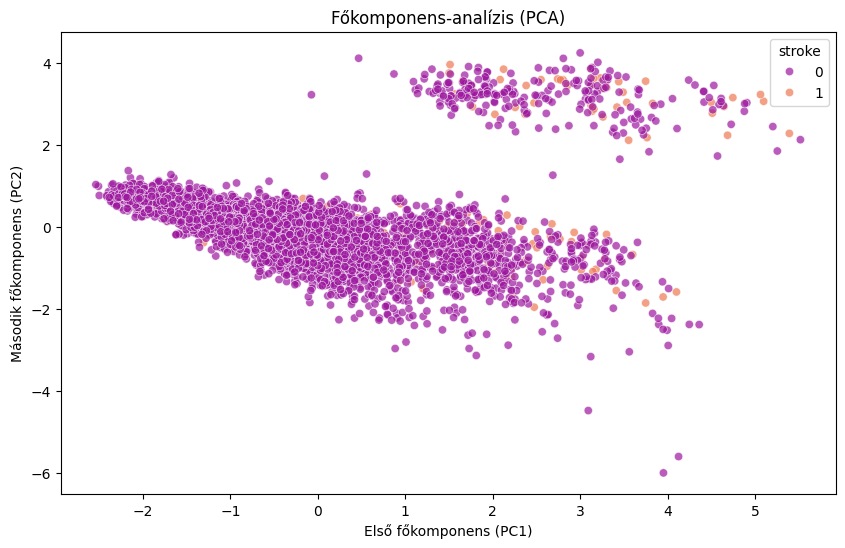

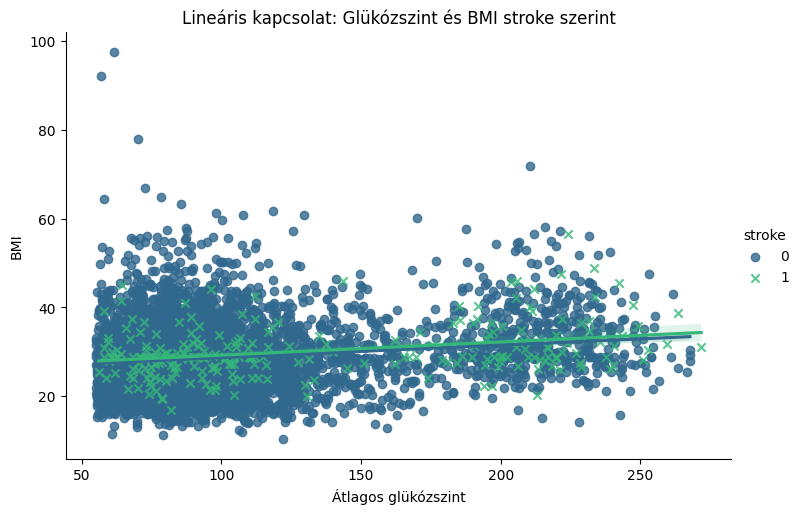

In [ ]:
from scipy.stats import pearsonr, spearmanr
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

data_cleaned = data_cleaned.dropna()  
numeric_cols = ['age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi']

pearson_corr = data_cleaned[numeric_cols].corr(method='pearson')
spearman_corr = data_cleaned[numeric_cols].corr(method='spearman')

# Korrelációs hőtérkép
plt.figure(figsize=(12, 6))
sns.heatmap(pearson_corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Pearson korrelációs mátrix")
plt.show()

plt.figure(figsize=(12, 6))
sns.heatmap(spearman_corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Spearman korrelációs mátrix")
plt.show()

# Lineáris összefüggések
for col in numeric_cols:
    if col != 'stroke':
        corr, _ = pearsonr(data_cleaned['stroke'], data_cleaned[col])
        print(f"Pearson korreláció stroke és {col} között: {corr:.2f}")

# Főkomponens-analízis (PCA)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(data_cleaned[numeric_cols])

pca = PCA(n_components=2)
pca_result = pca.fit_transform(X_scaled)

# Főkomponensek vizualizálása
pca_df = pd.DataFrame(data=pca_result, columns=['PC1', 'PC2'])
pca_df['stroke'] = data_cleaned['stroke'].values

plt.figure(figsize=(10, 6))
sns.scatterplot(data=pca_df, x='PC1', y='PC2', hue='stroke', palette='plasma', alpha=0.7)
plt.title('Főkomponens-analízis (PCA)')
plt.xlabel('Első főkomponens (PC1)')
plt.ylabel('Második főkomponens (PC2)')
plt.show()

# Glükózszint és BMI
sns.lmplot(
    data=data_cleaned,
    x='avg_glucose_level',
    y='bmi',
    hue='stroke',
    aspect=1.5,
    markers=['o', 'x'],
    palette='viridis'
)
plt.title('Lineáris kapcsolat: Glükózszint és BMI stroke szerint')
plt.xlabel('Átlagos glükózszint')
plt.ylabel('BMI')
plt.show()



In [26]:
from scipy.stats import ttest_ind

stroke_group = data_cleaned[data_cleaned['stroke'] == 1]['age']
non_stroke_group = data_cleaned[data_cleaned['stroke'] == 0]['age']

# T-próba
t_stat, p_value = ttest_ind(stroke_group, non_stroke_group, equal_var=False)

print("T-próba eredményei:")
print(f"T-statisztika: {t_stat:.2f}")
print(f"P-érték: {p_value:.4f}")

# Nullhipotézis jó-e
if p_value < 0.05:
    print("Elutasítjuk a nullhipotézist: Az életkor szignifikánsan eltér a stroke-ot elszenvedők és a nem elszenvedők között.")
else:
    print("Nem tudjuk elutasítani a nullhipotézist: Az életkor nem tér el szignifikánsan a stroke-csoportok között.")

T-próba eredményei:
T-statisztika: 29.68
P-érték: 0.0000
Elutasítjuk a nullhipotézist: Az életkor szignifikánsan eltér a stroke-ot elszenvedők és a nem elszenvedők között.
